In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Abdilfatah/Desktop/Data/week-8/fraud_data.csv")

In [5]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
null_values = df.isnull().sum()
print(null_values)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


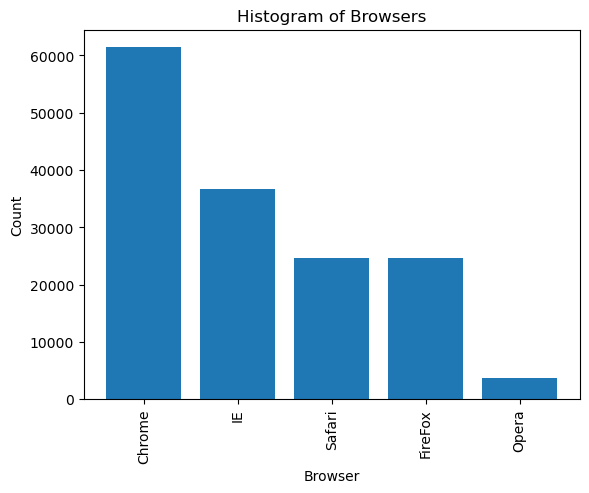

In [9]:
# Count the occurrences of each browser
browser_counts = df['browser'].value_counts()

# Plot the histogram
plt.bar(browser_counts.index, browser_counts.values)
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Histogram of Browsers')
plt.xticks(rotation=90)
plt.show()

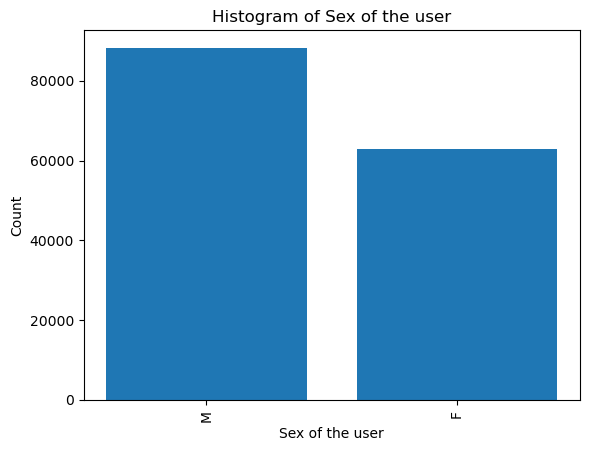

In [10]:
# Count the occurrences of each Sex
browser_counts = df['sex'].value_counts()

# Plot the histogram
plt.bar(browser_counts.index, browser_counts.values)
plt.xlabel('Sex of the user')
plt.ylabel('Count')
plt.title('Histogram of Sex of the user')
plt.xticks(rotation=90)
plt.show()

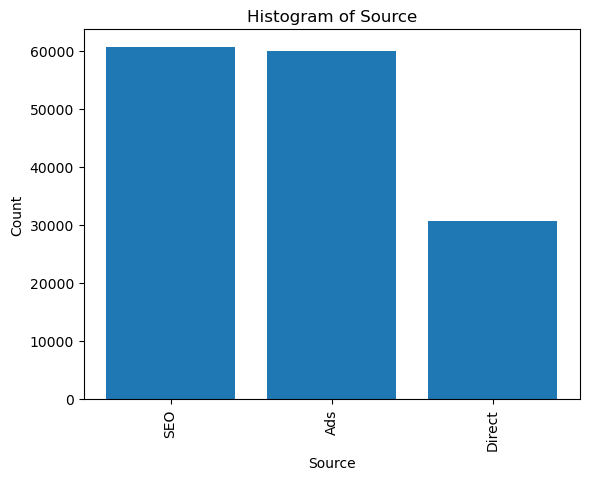

In [11]:
# Count the occurrences of each Source
browser_counts = df['source'].value_counts()

# Plot the histogram
plt.bar(browser_counts.index, browser_counts.values)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Histogram of Source')
plt.xticks(rotation=90)
plt.show()

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='object')


In [13]:
# Determining the minimum and maximum dates in the dataset to find the range of years
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

min_date = df['signup_time'].min()
max_date = df['signup_time'].max()
years_span = max_date.year - min_date.year
print('signup_min_date :',min_date)
print('signup_max_date :',max_date)

signup_min_date : 2015-01-01 00:00:42
signup_max_date : 2015-08-18 04:40:29


<Axes: >

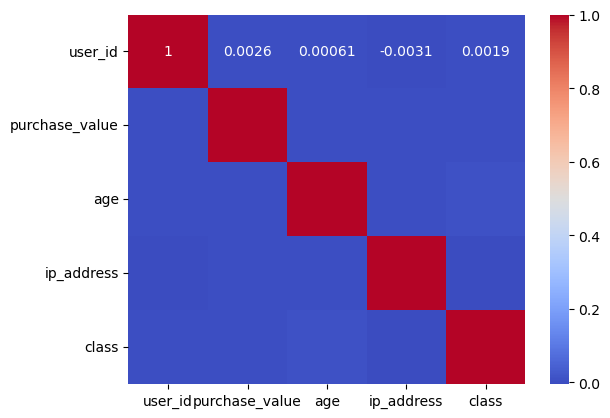

In [14]:
import seaborn as sns

# Select the numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [15]:
browser_counts = df.groupby('browser')['class'].sum()
print(browser_counts)

browser
Chrome     6069
FireFox    2342
IE         3187
Opera       328
Safari     2225
Name: class, dtype: int64


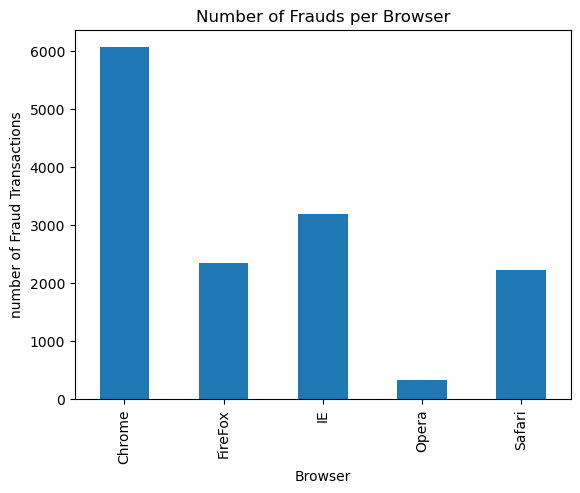

In [16]:
browser_counts.plot(kind='bar')
plt.xlabel('Browser')
plt.ylabel('number of Fraud Transactions')
plt.title('Number of Frauds per Browser')
plt.show()

sex
F    5717
M    8434
Name: class, dtype: int64


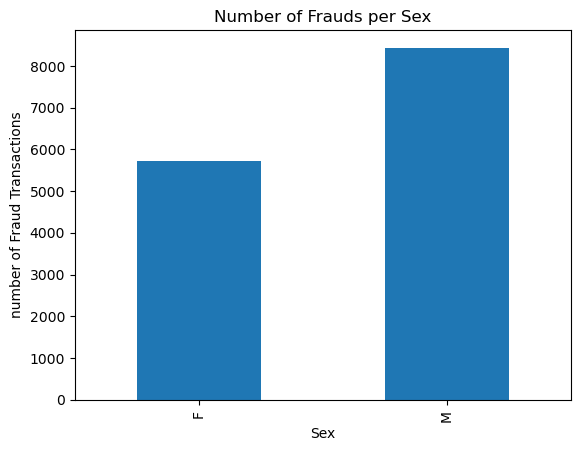

In [17]:
sex_counts = df.groupby('sex')['class'].sum()
print(sex_counts)

sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('number of Fraud Transactions')
plt.title('Number of Frauds per Sex')
plt.show()

source
Ads       5513
Direct    3226
SEO       5412
Name: class, dtype: int64


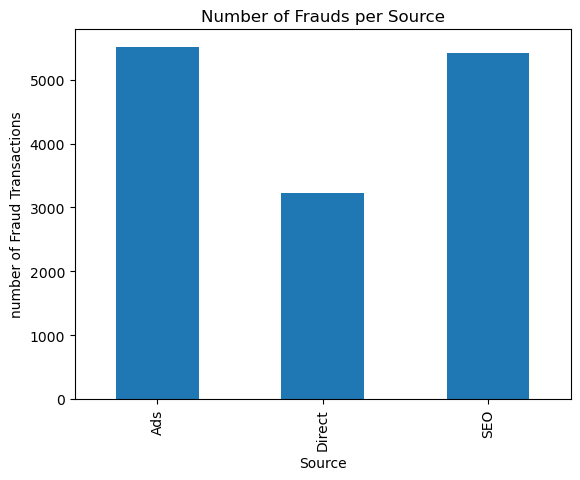

In [18]:
source_counts = df.groupby('source')['class'].sum()
print(source_counts)

source_counts.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('number of Fraud Transactions')
plt.title('Number of Frauds per Source')
plt.show()

In [19]:
df1 = pd.read_csv("C:/Users/Abdilfatah/Desktop/Data/week-8/IpAddress_to_Country.csv")

In [20]:
df1.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [22]:
null_values = df1.isnull().sum()
print(null_values)

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


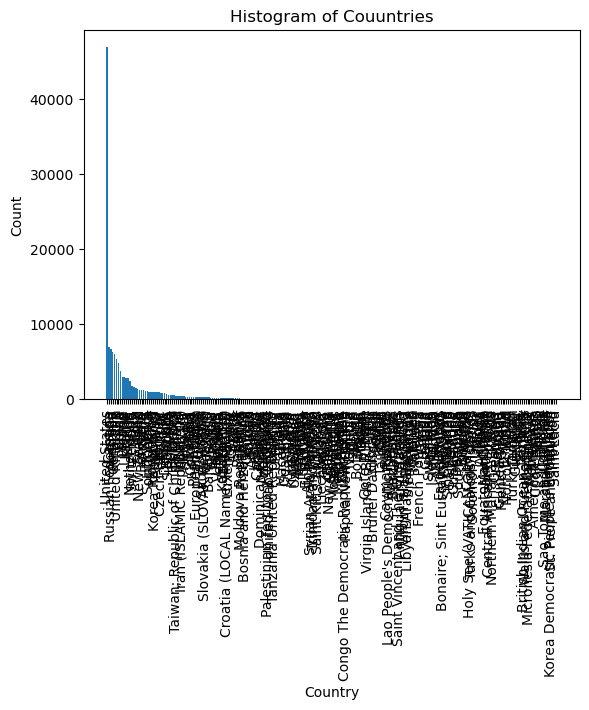

In [23]:
# Count the occurrences of each browser
c_counts = df1['country'].value_counts()

# Plot the histogram
plt.bar(c_counts.index, c_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Histogram of Couuntries')
plt.xticks(rotation=90)
plt.show()

In [24]:
df2 = pd.read_csv("C:/Users/Abdilfatah/Desktop/Data/week-8/creditcard.csv")

In [25]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
null_values = df2.isnull().sum()
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [28]:
df1['upper_bound_ip_address'] = df1['upper_bound_ip_address'].astype(int)
df1['lower_bound_ip_address'] = df1['lower_bound_ip_address'].astype(int)

In [29]:
df1.dtypes

lower_bound_ip_address     int32
upper_bound_ip_address     int32
country                   object
dtype: object

In [30]:
df1.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [31]:
merged_df = df.merge(df1, how='left', left_on='ip_address', right_on='lower_bound_ip_address')

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14724\114034309.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(df1, how='left', left_on='ip_address', right_on='lower_bound_ip_address')


In [32]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,NaN,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,NaN,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN,NaN,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,NaN,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN,NaN,NaN


In [33]:
# Calculate transaction frequency
transaction_frequency = df['user_id'].value_counts()

# Calculate transaction velocity
transaction_velocity = df.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

# Add the transaction frequency and velocity as new columns in the dataframe
df['transaction_frequency'] = transaction_frequency
df['transaction_velocity'] = transaction_velocity

In [34]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_frequency,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1.0,NaN


In [36]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_numerical_columns = scaler.fit_transform(numerical_columns)

# Create a new dataframe with the scaled numerical columns
scaled_df = pd.DataFrame(scaled_numerical_columns, columns=numerical_columns.columns)

C:\Users\Abdilfatah\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Abdilfatah\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Abdilfatah\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
